<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-формулы-расчёта-эффективности-обогащения" data-toc-modified-id="Проверка-формулы-расчёта-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка формулы расчёта эффективности обогащения</a></span></li><li><span><a href="#Признаки-в-тестовой-и-обучающей-выборках" data-toc-modified-id="Признаки-в-тестовой-и-обучающей-выборках-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Признаки в тестовой и обучающей выборках</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#StandarScaler" data-toc-modified-id="StandarScaler-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>StandarScaler</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-лучшей-модели" data-toc-modified-id="Проверка-лучшей-модели-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Проверка лучшей модели</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

**Технологический процесс**
* `Rougher feed` — исходное сырье

* `Rougher additions` (или reagent additions) — флотационные реагенты:
    * `Xanthate` — ксантогенат (промотер, или активатор флотации);
    * `Sulphate` — сульфат (на данном производстве сульфид натрия);
    * `Depressant` — депрессант (силикат натрия).
* `Rougher process` (англ. «грубый процесс») — флотация
* `Rougher tails` — отвальные хвосты
* `Float banks` — флотационная установка
* `Cleaner process` — очистка
* `Rougher Au` — черновой концентрат золота
* `Final Au` — финальный концентрат золота

**Параметры этапов**
* `air amount` — объём воздуха

* `fluid levels` — уровень жидкости
* `feed size` — размер гранул сырья
* `feed rate` — скорость подачи

**Наименование признаков**

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
* `rougher` — флотация

* `primary_cleaner` — первичная очистка
* `secondary_cleaner` — вторичная очистка
* `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
* `input` — параметры сырья

* `output` — параметры продукта
* `state` — параметры, характеризующие текущее состояние этапа
* `calculation` — расчётные характеристики

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_score, KFold, LeavePGroupsOut, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


На первый взгляд неправильный тип данных в столбце 'date', надо исправить его на нужный формат

In [4]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d %H:%M:%S')

In [5]:
print(full_data.duplicated().sum())
print(full_data.isnull().sum())

0
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


Заполним все Nan

In [6]:
full_data = full_data.interpolate()
train_data = train_data.interpolate()
test_data = test_data.interpolate()

### Проверка формулы расчёта эффективности обогащения

$$
\mathbf{Recovery} = \frac{Concentrate * (Feed - Tail)}{Feed * (Concentrate - Tail)} * 100\%
$$

где:

- Concentrate — доля золота в концентрате после флотации/очистки;
- Feed — доля золота в концентрате до флотации/очистки;
- Tail — доля золота в отвальных хвостах после флотации/очистки.

In [7]:
def recovery(row): #формула расчёта эффективности обогащения
    conc = row['rougher.output.concentrate_au']
    feed = row['rougher.input.feed_au']
    tail = row['rougher.output.tail_au']

    recovery = (conc * (feed - tail)) / (feed * (conc - tail)) * 100

    return recovery

In [8]:
calculated = train_data.apply(recovery, axis=1).dropna()
existing = train_data['rougher.output.recovery'].dropna()

mae = mean_absolute_error(calculated, existing)

print('Средняя абсолютная ошибка (MAE):', mae)

Средняя абсолютная ошибка (MAE): 9.73512347450521e-15


MAE очень мало, значит различий между данными нет, т.е рассчеты корректны.

### Признаки в тестовой и обучающей выборках

В тестовой и обучающей выборках разное количество столбцов. Найдем столбцы, которых нет в тестовой выборке

In [9]:
missing_columns = set(train_data.columns) - set(test_data.columns)

print(f'Отсутствующие признаки: {len(missing_columns)}')
display(missing_columns)

Отсутствующие признаки: 34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутствуют столбцы с маркировкой 'output' на разных этапах обработки и 'calculation' - расчетные признаки, которые сообщают измéренные и расчётные параметры продукта, получившегося в результате одной из четырех технологических стадий очистки. В тестовой выборке отсутствуют целевые признаки - rougher.output.recovery и final.output.recovery

Также, скорее всего, что те признаки, которых в тестовой выборке нет, могут стать утечкой целевого признака при обучении модели, так как являются или расчетными или итоговыми. В поготовке мы добавил и удалим все нужные и ненужные столбцы

## Анализ данных

In [10]:
metall = ['au', 'ag', 'pb']
stages_concentrate = ['rougher.input.feed_', 'rougher.output.concentrate_','primary_cleaner.output.concentrate_', 
                      'final.output.concentrate_',]
stages_tail = ['rougher.input.feed_', 'rougher.output.tail_','primary_cleaner.output.tail_', 'final.output.tail_',]

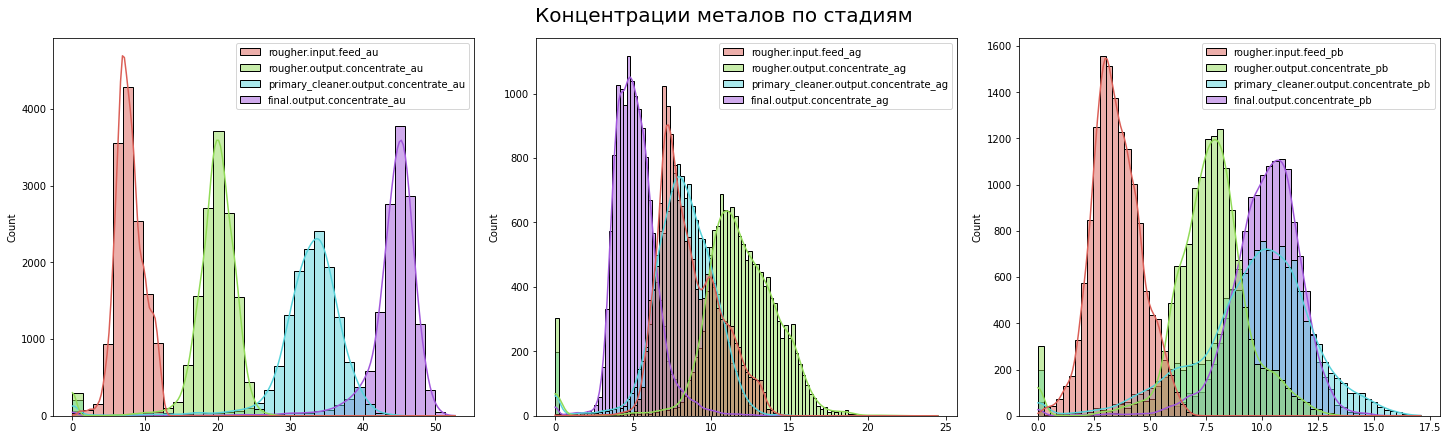

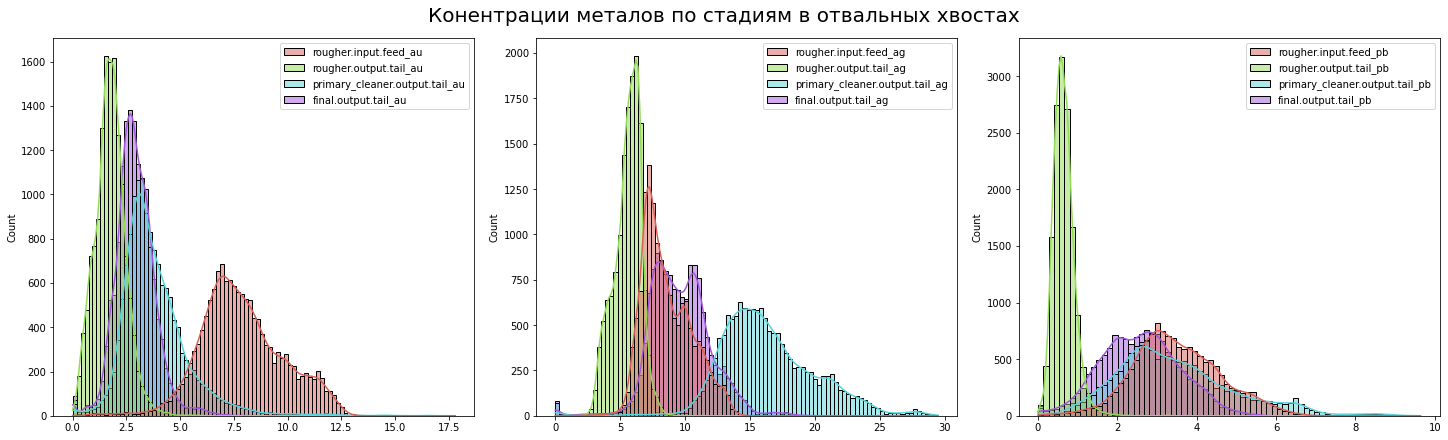

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)
fig.suptitle('Концентрации металов по стадиям', fontsize=20)

for metal, ax in zip(metall, axs): 
    current_stage_name = [stage+metal for stage in stages_concentrate]
    sns.histplot(train_data[current_stage_name].dropna(), label=current_stage_name, 
                 ax=ax, kde=True, linewidth=1, palette='hls') 


    

fig, axs = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)
fig.suptitle('Конентрации металов по стадиям в отвальных хвостах', fontsize=20)

for metal, ax in zip(metall, axs): 
    current_stage_name = [stage+metal for stage in stages_tail]
    sns.histplot(train_data[current_stage_name].dropna(), label=current_stage_name, 
                 ax=ax, kde=True, linewidth=1, palette='hls') 


plt.show()

Концентрация серебра во время очистки падает, а вот концентрация золота и свинца возрастает

Концентрация в отвальных хвостах расстёт, но медленнее

Также в обеих стадиях наблюдаются аномальные значения равные нулю, от них в последующем нужно будет избавиться, возможно, данные отсутствуют из-за того что их не замеряли, либо они утраченны

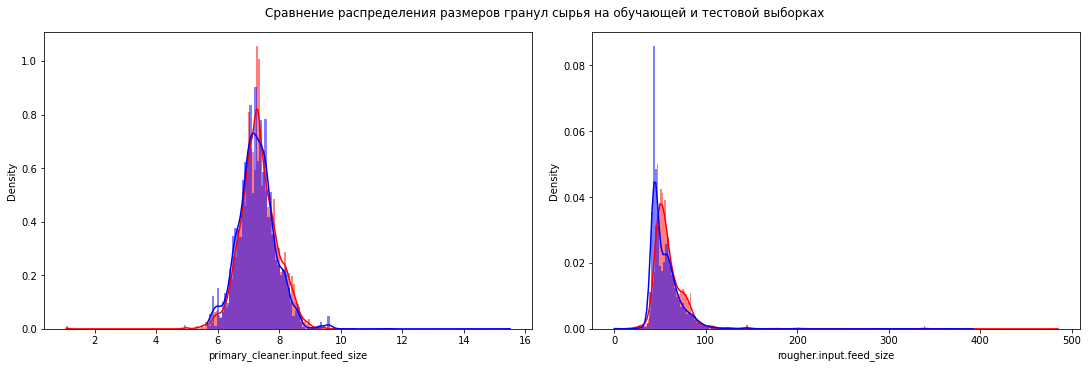

In [12]:
size_column = ['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
fig, axs = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
fig.suptitle('Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках')

for name,  ax in zip(size_column, axs):
    sns.histplot(train_data[name],  color='r', ax=ax, kde=True, stat="density", linewidth=0)
    sns.histplot(test_data[name],  color='b', ax=ax, kde=True, stat="density", linewidth=0)

plt.show()

Визулально данные практически совпадают, это значит что размер гранул на обучающей и тестовой выборке не меняется

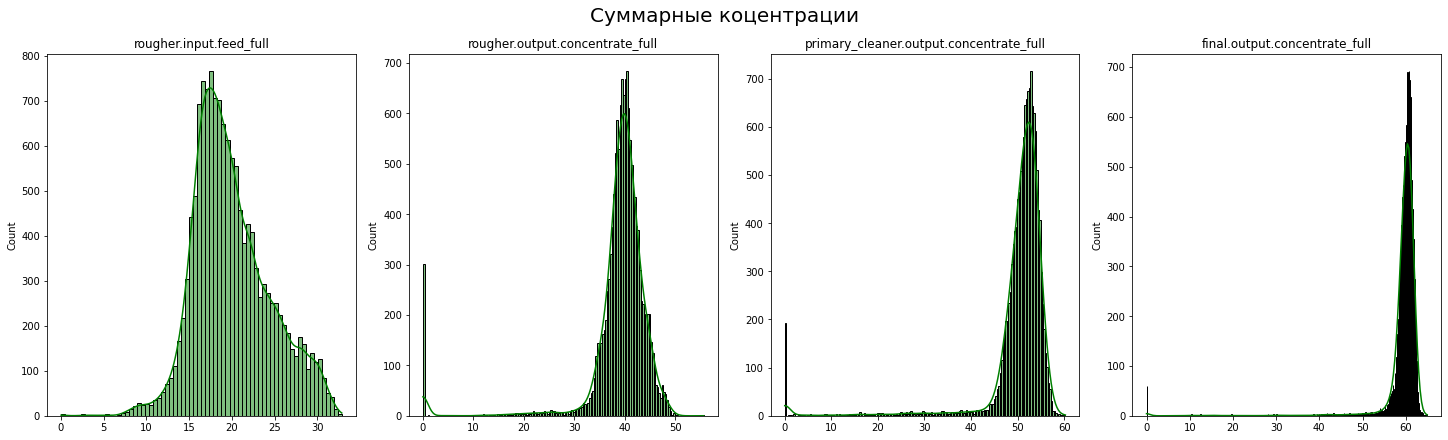

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)
fig.suptitle('Суммарные коцентрации', fontsize=20)

for stage, ax in zip(stages_concentrate, axs):
    ax.set_title(stage+'full')
    sum_train = train_data[stage+ 'ag'] + train_data[stage+ 'au'] + train_data[stage+ 'pb']

    sns.histplot(sum_train.dropna(), ax=ax, kde=True, linewidth=1, color='g')

plt.show()

Концентрации металлов возрастают, заначит очистка эффективна

В этих графиках также наблюдаются значения равные нулю, поэтому сейчас приступим к их зачистке

In [14]:
error_data = [False]*full_data.shape[0]
error_train = [False]*train_data.shape[0]
for stage in stages_concentrate:
    ax.set_title(stage)
    names = [stage+metal for metal in metall]
    
    error_data = error_data | (full_data[names].sum(axis=1) == 0)
    error_train = error_train | (train_data[names].sum(axis=1) == 0)

print(full_data[error_data].shape)  
print(train_data[error_train].shape) 

(591, 87)
(424, 87)


In [15]:
test_error = test_data.index.isin(full_data[error_data].index)

test_data = test_data.drop(test_data[test_data.index.isin(full_data[error_data].index)].index)

train_data = train_data.drop(train_data[error_train].index)

full_data = full_data.drop(full_data[error_data].index)

## Модель
### Подготовка

Создадим функцию для посчета sMAPE и итогового sMAPE и разделим данные на нужные выборки

$$
\mathbf{sMAPE} = 
\frac{1}{N}
\sum_{i=1}^N
\frac{|y_i - \hat y_i|}{(|y_i| + |\hat y_i|)\ /\ 2} * 100\%
$$


$$
\mathbf{Итоговое\ sMAPE} = 25\%\ \mathbf{sMAPE}_{rougher} + 75\%\ \mathbf{sMAPE}_{final}
$$

In [16]:
def smape (target, predict):
    smape = (np.sum((abs(target - predict)) / ((abs(target) + abs(predict)) / 2))) * 100 / len(target)
    return smape

def final_smape (smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

smape_score = make_scorer(smape, greater_is_better=False)

Поделим данные

In [17]:
test_data = test_data.merge(full_data[['date', 'final.output.recovery', 'rougher.output.recovery']], on='date', how='left')
missing_col = [col for col in train_data.columns if col not in test_data.columns]
train_data = train_data.drop(missing_col, axis=1)

rougher_columns = [i for i in train_data if 'rougher' in i and 'recovery' not in i]
final_columns = [i for i in train_data if 'rougher' not in i]

def ft_data(data):
    features_rougher = data[rougher_columns]
    
    features_final = data[final_columns].drop(['date', 'final.output.recovery'], axis=1)
    
    target_rougher = data['rougher.output.recovery']
    target_final = data['final.output.recovery']
    
    print('Размер датасета с признаками для предсказания "rougher.output.recovery"', features_rougher.shape)
    print('Размер датасета с признаками для предсказания "final.output.recovery"', features_final.shape)
    print('Размер датасета с целевым признаком "rougher"',  target_rougher.shape)
    print('Размер датасета с целевым признаком "final"', target_final.shape)
    print()
    return features_rougher, features_final, target_rougher, target_final

In [18]:
feautures_rougher_train, feautures_final_train, target_rougher_train, target_final_train = ft_data(train_data)
feautures_rougher_test, feautures_final_test, target_rougher_test, target_final_test = ft_data(test_data)

Размер датасета с признаками для предсказания "rougher.output.recovery" (13725, 22)
Размер датасета с признаками для предсказания "final.output.recovery" (13725, 30)
Размер датасета с целевым признаком "rougher" (13725,)
Размер датасета с целевым признаком "final" (13725,)

Размер датасета с признаками для предсказания "rougher.output.recovery" (5157, 22)
Размер датасета с признаками для предсказания "final.output.recovery" (5157, 30)
Размер датасета с целевым признаком "rougher" (5157,)
Размер датасета с целевым признаком "final" (5157,)



### StandarScaler

Стандартизируем данные

In [19]:
pd.options.mode.chained_assignment = None
final_columns = feautures_final_train.columns

# стандартизация для флотации
scaler_rougher = StandardScaler()
scaler_rougher.fit(feautures_rougher_train[rougher_columns])

feautures_rougher_train[rougher_columns] = scaler_rougher.transform(feautures_rougher_train[rougher_columns])
feautures_rougher_test[rougher_columns] = scaler_rougher.transform(feautures_rougher_test[rougher_columns])

# стандартизация для финала
scaler_final = StandardScaler()
scaler_final.fit(feautures_final_train[final_columns])

feautures_final_train[final_columns] = scaler_final.transform(feautures_final_train[final_columns])
feautures_final_test[final_columns] = scaler_final.transform(feautures_final_test[final_columns])

### Обучение моделей

Будем обучать модели:
    
    - LinearRegression()
    - DecisionTreeRegressor()
    - RandomForestRegressor()

In [ ]:
def cross_val(model, feautures, target):
    
    scores = cross_val_score(model, feautures, target, scoring=smape_score, cv=5, n_jobs=-1)
    
    return scores.mean()

In [ ]:
models = [LinearRegression(), 
          DecisionTreeRegressor(random_state=12345), 
          RandomForestRegressor(random_state=12345)]

scores_rougher, scores_final, final_score = [], [], []

for i in models:
    # smape флотации
    scores_r = cross_val_score(i, feautures_rougher_train, target_rougher_train, 
                             scoring=smape_score, cv=5, n_jobs=-1)
    
    scores_rougher.append(scores_r.mean())
    
    # smape финала 
    scores_f = cross_val_score(i, feautures_final_train, target_final_train, 
                             scoring=smape_score, cv=5, n_jobs=-1)
    
    scores_final.append(scores_f.mean())

In [ ]:
for i in range(len(scores_final)):
    DummyRegressor
    final_score.append(final_smape(scores_rougher[i], scores_final[i]))

scores_sMape = pd.DataFrame({'scores_rougher': scores_rougher,
                           'scores_final': scores_final,
                            'final_smape': final_score},
                           index=['LinearRegression', 'DecisionTreeRegressor', 
                                   'RandomForestRegressor'])
scores_sMape

Модель линейной регресси показала лучший sMAPE 8.9, а вот худшая модель дерево решений

Попробуем улучшить модели, подобрав им гиперпараметры методом GridSearchCV

In [ ]:
def best_hyper_model(model, parameters_m, feautures, target):
    
    # подбор лучших гиперпараметров модели с учетом метрики sMape
    
    grid_m = GridSearchCV(model, parameters_m, cv=5, n_jobs=-1, scoring=smape_score)
    grid_m.fit(feautures, target)

    best_params = grid_m.best_params_

    print('Гиперпараметры лучшей модели', best_params)
    
    # обучение модели с лучшими гиперпараметрами и вывод на экран метрики sMape
    # функция возвращает модель, гиперпараметры
    
    best_model = model
    best_model.set_params(**best_params) # добавление лучших гиперпараметров

    return best_model, best_params 

### Линейная регрессия

In [24]:
parameters_logist ={'fit_intercept':[True, False], 
             'copy_X':[True, False], 
             'normalize': [True, False]}

In [25]:
model_logist, params_logist = best_hyper_model(LinearRegression(), parameters_logist, 
                                           feautures_rougher_train, target_rougher_train)

smape_logist = cross_val(model_logist, feautures_rougher_train, target_rougher_train)
print('Результат кросс-валидации метрики sMape для флотации модели линейной регрессии', smape_logist)

Гиперпараметры лучшей модели {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Результат кросс-валидации метрики sMape для флотации модели линейной регрессии -6.482584101899313


In [26]:
model_logist_f, params_logist_f = best_hyper_model(
    LinearRegression(), parameters_logist, feautures_final_train, target_final_train)

smape_logist_f = cross_val(model_logist_f, feautures_final_train, target_final_train)
print('Результат кросс-валидации метрики sMape для финала модели линейной регрессии', smape_logist_f)

Гиперпараметры лучшей модели {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Результат кросс-валидации метрики sMape для финала модели линейной регрессии -9.733547790993573


In [27]:
smape_logist_fin = final_smape(smape_logist, smape_logist_f)
print('Финальное sMape для линейной регрессии', smape_logist_fin)

Финальное sMape для линейной регрессии -8.920806868720007


sMape не изменилось, значит лучше гиперпараметры для линейной регрессии должны быть по умолчанию

### Дерево решений

In [28]:
parameters_tree  = {'max_depth': range(1, 10), 'min_samples_split': range(2, 7)}

In [29]:
model_treeR, params_treeR = best_hyper_model(model=DecisionTreeRegressor(random_state=5), 
                                                          parameters_m=parameters_tree, 
                                                          feautures=feautures_rougher_train, 
                                                          target=target_rougher_train)
smape_treeR = cross_val(model_treeR, feautures_rougher_train, target_rougher_train)
print('Результат кросс-валидации метрики sMape для флотации модели дерева решений', smape_treeR)

Гиперпараметры лучшей модели {'max_depth': 3, 'min_samples_split': 2}
Результат кросс-валидации метрики sMape для флотации модели дерева решений -7.191747399716408


In [30]:
model_treeF, params_treeF = best_hyper_model(model=DecisionTreeRegressor(random_state=5), 
                                                          parameters_m=parameters_tree, 
                                                          feautures=feautures_final_train, 
                                                          target=target_final_train)
smape_treeF = cross_val(model_treeF, feautures_final_train, target_final_train)
print('Результат кросс-валидации метрики sMape для флотации модели дерева решений', smape_treeF)

Гиперпараметры лучшей модели {'max_depth': 1, 'min_samples_split': 2}
Результат кросс-валидации метрики sMape для флотации модели дерева решений -10.107853361648278


In [31]:
smape_tree_fin = final_smape(smape_treeR, smape_treeF)
print('Финальное sMape для линейной регрессии', smape_tree_fin)

Финальное sMape для линейной регрессии -9.37882687116531


Подбор гиперпараметров для дерева решений значительно улучшил метрику sMape:  
- для этапа флотации c 8.9 до 7.1     
- финального этапа с 19.9 до 10.1   
- финальное smape 17.1 до 9.3

### Случайный лес

In [32]:
parameters_forest  = {'max_depth': range(1, 10)}

In [33]:
model_forestR, params_forestR = best_hyper_model(model=RandomForestRegressor(random_state=5, n_jobs=-1), 
                                                          parameters_m=parameters_forest, 
                                                          feautures=feautures_rougher_train, 
                                                          target=target_rougher_train)

smape_forestR = cross_val(model_forestR, feautures_rougher_train, target_rougher_train)
print('Результат кросс-валидации метрики sMape для флотации модели случайного леса', smape_forestR) 

Гиперпараметры лучшей модели {'max_depth': 4}
Результат кросс-валидации метрики sMape для флотации модели случайного леса -6.67442474696122


In [34]:
model_forestF, params_forestF = best_hyper_model(model=RandomForestRegressor(random_state=5, n_jobs=-1), 
                                                          parameters_m=parameters_forest, 
                                                          feautures=feautures_final_train, 
                                                          target=target_final_train)

smape_forestF = cross_val(model_forestF, feautures_final_train, target_final_train)
print('Результат кросс-валидации метрики sMape для финального этапа модели случайного леса', smape_forestF)

Гиперпараметры лучшей модели {'max_depth': 1}
Результат кросс-валидации метрики sMape для финального этапа модели случайного леса -9.964412308627555


In [35]:
smape_forest_fin = final_smape(smape_forestR, smape_forestF)
print('Финальное sMape модели случайного леса', smape_forest_fin)

Финальное sMape модели случайного леса -9.14191541821097


Подбор гиперпараметров для дерева решений значительно улучшил метрику sMape:  
- для этапа флотации c 6.8 до 6.6     
- финального этапа с 12.5 до 9.9     
- финальное smape 11.1 до 9.1 

Лучше всех оказалась модель линейно регрессии с гиперпараметрыми по умолчанию

### Проверка лучшей модели

In [40]:
model_r = LinearRegression()
model_r.fit(feautures_rougher_train, target_rougher_train)

rougher_predict = model_r.predict(feautures_rougher_test)
rougher_spame = smape(target_rougher_test, rougher_predict)

model_f = LinearRegression()
model_f.fit(feautures_final_train, target_final_train)

final_predict = model_f.predict(feautures_final_test)
spame_final = smape(target_final_test, final_predict)

smape_test_reg = final_smape(rougher_spame, spame_final)
print('Финальное sMape при тестировании модели линейной регрессии', smape_test_reg)

Финальное sMape при тестировании модели линейной регрессии 7.054372779670948


Финальный результат sMape лучшей модели равен 7

### Проверка на адекватность

In [41]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(feautures_rougher_train, target_rougher_train)

r_predict = dummy_regr.predict(feautures_rougher_test)
r_spame = smape(target_rougher_test, r_predict)

dummy_regf = DummyRegressor(strategy="mean")
dummy_regf.fit(feautures_final_train, target_final_train)

f_predict = dummy_regf.predict(feautures_final_test)
spame_f = smape(target_final_test, f_predict)

smape_dummy_test = final_smape(r_spame, spame_f)
print('Финальное sMape Дамми на тестовой выборке', smape_dummy_test)

Финальное sMape Дамми на тестовой выборке 7.540167912741557


Финальная модель оказалась лучше дамми-модели на 0.5

## Вывод

- Подготовили данные, изменив в столбац данные и заполнив пропуски   
- Проверили формулу расчёта эффективности обогащения, MAE очень мало, значит различий между данными нет, т.е рассчеты корректны. 
- В тестовой выборке отсутствуют столбцы с маркировкой 'output' на разных этапах обработки и 'calculation' - расчетные признаки, которые сообщают измéренные и расчётные параметры продукта, получившегося в результате одной из четырех технологических стадий очистки. В тестовой выборке отсутствуют целевые признаки - rougher.output.recovery и final.output.recovery
- Также, скорее всего, что те признаки, которых в тестовой выборке нет, могут стать утечкой целевого признака при обучении модели, так как являются или расчетными или итоговыми. В поготовке мы добавил и удалим все нужные и ненужные столбцы
- Проанализировали данные, убрали аномальные значения
- Узнали, что концентрация серебра во время очистки падает, а вот концентрация золота и свинца возрастает
- Концентрация в отвальных хвостах расстёт, но медленнее
- Распределения размеров гранул сырья на обучающей и тестовой выборках совпадает
- Концентрации металлов возрастают, заначит очистка эффективна
- Подготовли функцию для посчета sMAPE и итогового sMAPE, разделили данные на нужные выборки и стандартизировали
- Обучили модели и подобрали гиперпараметры, лучшей моделью по sMAPE оказалась линейная регрессия
- Финальный результат sMape на линейной регрессии = 7, модель оказалась адекватной